## Mercedes-Benz Greener Manufacturing
### Can you cut the time a Mercedes-Benz spends on the test bench?

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

**File descriptions**
- Variables with letters are categorical. 
- Variables with 0/1 are binary values.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('M6W4/train.csv')
df_test = pd.read_csv('M6W4/test.csv')

### 1.Data Cleaning & EDA

In [3]:
df_train.shape

(4209, 378)

In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# check for null values
print ('Number of null values :', df_train.isna().sum().sum())

Number of null values : 0


In [6]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# some of the features have exactly the same values. It is safe to drop the one of them 
cols = df_train.columns.tolist()
for col1 in cols:
    for col2 in cols:
        if (col1 != col2) and df_train[col1].equals(df_train[col2]):
            df_train.drop(col2,axis=1,inplace=True)
            cols.remove(col2)

df_train.shape

(4209, 322)

In [8]:
# check for duplicate rows
print ('number of duplicates:', df_train.duplicated().sum())
print ('number of duplicates (excluding ID):', df_train.iloc[:,1:].duplicated().sum())
print ('number of duplicates (excluding ID & y):', df_train.iloc[:,2:].duplicated().sum())
print (f'percentage of duplicates (excluding ID & y):{df_train.iloc[:,2:].duplicated().sum()/df_train.shape[0]*100:2.2f}')

number of duplicates: 0
number of duplicates (excluding ID): 1
number of duplicates (excluding ID & y): 298
percentage of duplicates (excluding ID & y):7.08


In [9]:
# Having the same set of features with different result "y" will confuse the model and drop the accuracy 
# therefore, we will drop the duplicates (excluding ID & y)
df_train = df_train.drop_duplicates(subset=df_train.columns[2:], keep='last')
df_train.shape

(3911, 322)

In [10]:
# check the numeric and non-numeric columns
num_col = []
cat_col = []
for col in df_train.columns:
    if (df_train[col].dtype==object):
        cat_col.append(col)
    elif (df_train[col].dtype==float or df_train[col].dtype=='int64'):
        num_col.append(col)
        
print ('Count of numeric features :', len(num_col))
print ('count of non-numeric features :', len(cat_col))

Count of numeric features : 314
count of non-numeric features : 8


<AxesSubplot:xlabel='y'>

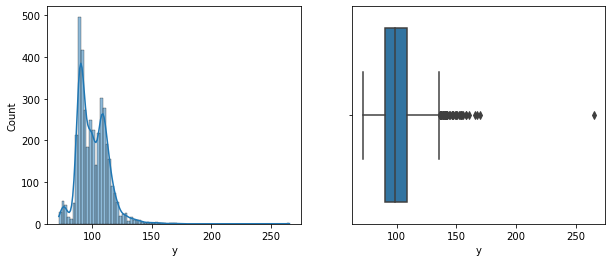

In [11]:
# let's start by trying to understand 'y'
fig,axes = plt.subplots (nrows=1, ncols=2, figsize=(10,4))
sns.histplot(x=df_train['y'], kde=True, ax=axes[0])
sns.boxplot(x=df_train['y'], ax=axes[1])

In [12]:
# drop the outlier
df_train.drop(df_train.loc[df_train['y'] > 250].index, inplace=True)
df_train.shape

(3910, 322)

<AxesSubplot:xlabel='y'>

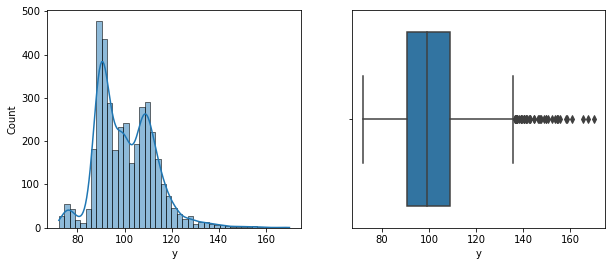

In [13]:
fig,axes = plt.subplots (nrows=1, ncols=2, figsize=(10,4))
sns.histplot(x=df_train['y'], kde=True, ax=axes[0])
sns.boxplot(x=df_train['y'], ax=axes[1])

<AxesSubplot:>

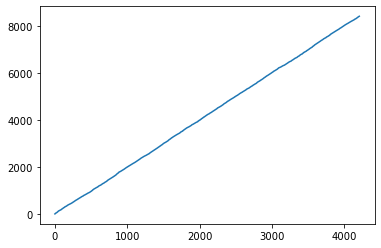

In [14]:
# ID is not in sequence - could be a timestamp
df_train['ID'].plot()

In [15]:
# ID is cleary not increasing by 1 
# we will test if there is a relationship between ID & any of the categorical data
y_inc = df_train['ID'] - df_train['ID'].shift(1)
y_inc.value_counts()

1.0     1823
2.0      965
3.0      520
4.0      280
5.0      146
6.0       79
7.0       39
8.0       29
9.0       17
11.0       5
10.0       4
13.0       1
14.0       1
Name: ID, dtype: int64

<AxesSubplot:xlabel='ID', ylabel='y'>

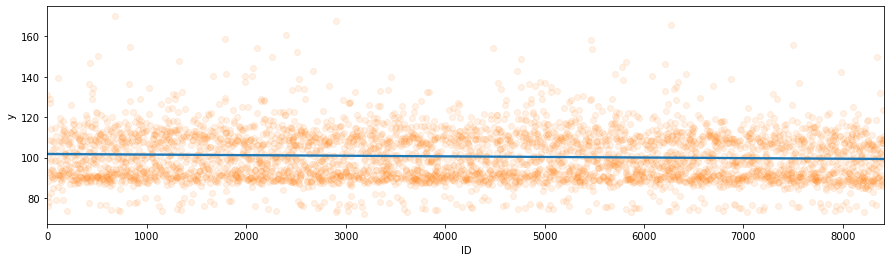

In [16]:
# we plot ID & y regression - insterestingly, y is slightly dropping   
plt.figure(figsize=(15,4))
sns.regplot(x='ID',y='y',data=df_train,scatter_kws={'color':'C1', 'alpha':0.1}, line_kws={'color':'C0'})

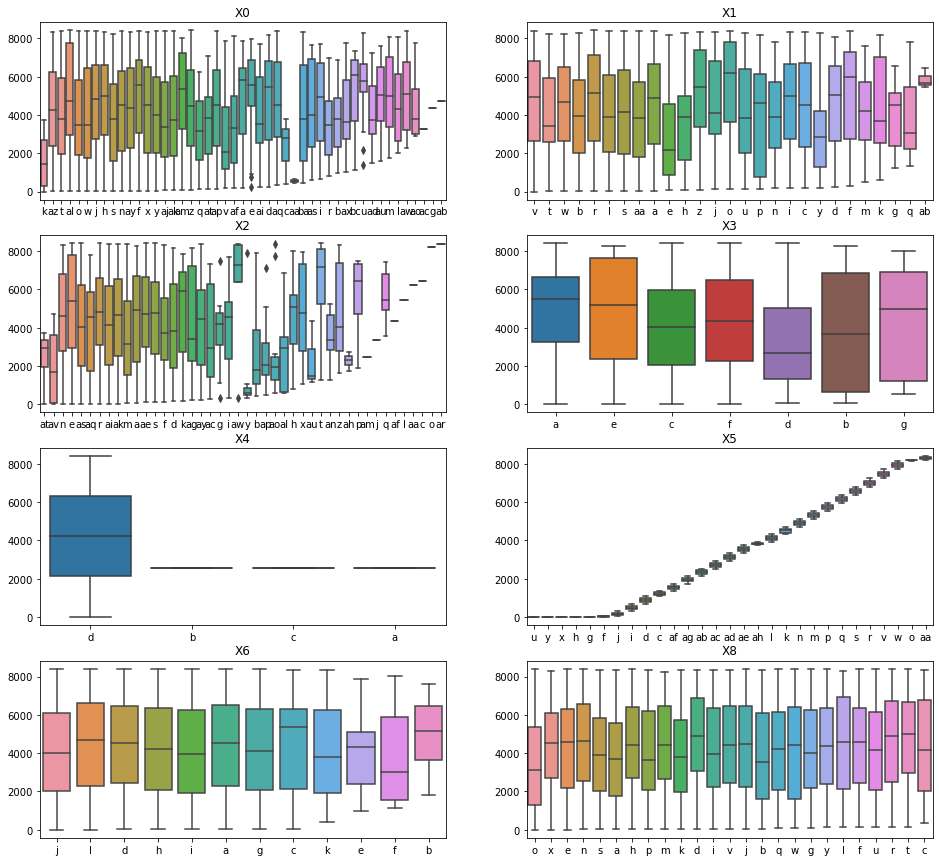

In [17]:
# Visualizing categorical variables by ID to see if there is a trend
fig, axes = plt.subplots(nrows=len(cat_col)//2, ncols=2, figsize=(16,15))
for n, col in enumerate(cat_col):
    sns.boxplot(x=df_train[col], y=df_train['ID'],ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(col)
    axes[n//2, n%2].set_xlabel('')
    axes[n//2, n%2].set_ylabel('')

From the visualization above, it seems that X5 is some sort of grouping by ID and X4 shows very minimum variance


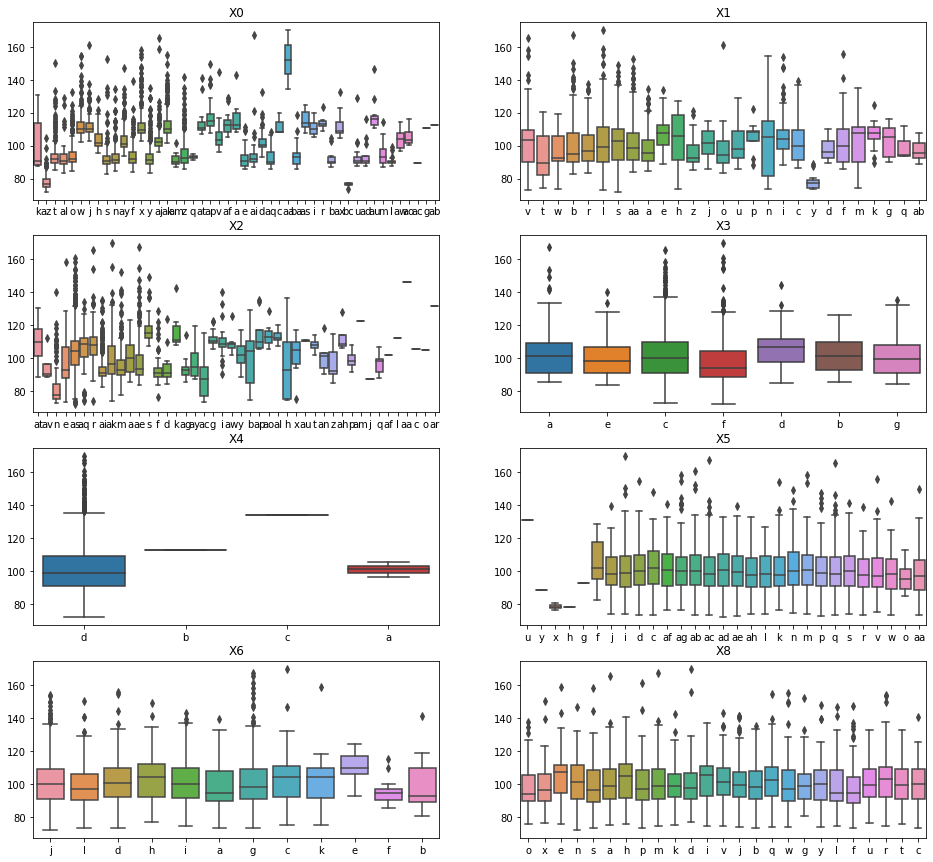

In [18]:
# Visualizing categorical variables by y
fig, axes = plt.subplots(nrows=len(cat_col)//2, ncols=2, figsize=(16,15))
for n, col in enumerate(cat_col):
    sns.boxplot(x=df_train[col], y=df_train['y'],ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(col)
    axes[n//2, n%2].set_xlabel('')
    axes[n//2, n%2].set_ylabel('')

In [19]:
# examining the values of X4
df_train['X4'].value_counts()

d    3906
a       2
c       1
b       1
Name: X4, dtype: int64

In [20]:
# i think it's fair to drop X4 since the variance is very minimum 
df_train.drop('X4',axis=1,inplace=True)
df_train.shape

(3910, 321)

In [21]:
# now let's check X5
df_train['X5'].nunique()

29

In [22]:
# for X5 - we define the range of IDs per X5 category and check for overlaps 
df_X5 = df_train.groupby('X5').agg({'ID':['count','min','max'], 'y':'mean'}).sort_values(('ID','min'))
df_X5['overlap'] = df_X5[('ID','min')].shift(-1) - df_X5[('ID','max')]
df_X5

ID                       y overlap
   count   min   max        mean        
X5                                      
u      1     0     0  130.810000     6.0
y      1     6     6   88.530000     1.0
x      2     7     9   78.440000     4.0
h      1    13    13   78.020000     5.0
g      1    18    18   92.930000     6.0
f      7    24    34  105.594286     3.0
j    107    37   295   99.959252     5.0
i    195   300   684  101.175692     2.0
d    192   686  1090  101.100938     2.0
c    118  1092  1342  102.546610     2.0
af   165  1344  1746  101.061333     2.0
ag   188  1748  2152  102.313989     1.0
ab   185  2153  2528  101.955892     3.0
ac   194  2531  2940   99.985515     4.0
ad   175  2944  3336  100.942229     6.0
ae   194  3342  3738  100.798196     2.0
ah    94  3740  3915   99.281064   -10.0
l    182  3905  4317   99.534560     2.0
k    163  4319  4687  100.170798     4.0
n    196  4691  5106  102.591684     4.0
m    193  5110  5513  101.951347     1.0
p    200  5514  5948  100.598350     1.0
q    201  5949  6362  100.455970     3.0
s    203  6365  6783  100.248571     2.0
r    205  6785  7238   98.380146     3.0
v    212  7241  7714   99.477217     2.0
w    211  7716  8164   98.597725     1.0
o     19  8165  8200   96.588947     3.0
aa   105  8203  8417   98.429238     NaN

It's clear that X5 is grouping by ID with one overlap - i will keep it 

In [23]:
cat_col.remove('X4')
cat_col

['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']

In [24]:
# count of unique values in non-numeric columns
for col in cat_col:
    print (col, ':',df_train[col].nunique())

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X5 : 29
X6 : 12
X8 : 25


In [25]:
# One hot encoding for categorical features
for col in cat_col:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])
#    df_train = pd.get_dummies(df_train, columns=[col], prefix=[col] )
df_train.shape

(3910, 321)

In [26]:
# count of unique values in non-numeric columns
for col in cat_col:
    print (col, ':',df_train[col].nunique())

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X5 : 29
X6 : 12
X8 : 25


In [27]:
# now we examine the numeric features
num_col.remove('ID')
num_col.remove('y')

In [28]:
# check the columns with fixed value - this can be removed
for col in num_col:
    if (df_train[col].nunique()==1):
        print (col, ":", df_train[col].nunique())
        df_train.drop(col,axis=1,inplace=True)
        num_col.remove(col)

X290 : 1


In [29]:
df_train.shape

(3910, 320)

In [30]:
# some of the features have exactly the opposite values. it is safe to drop the one of them 
for col1 in num_col:
    for col2 in num_col:
        if (col1 != col2) and ((df_train[col1] == df_train[col2]).sum()==0):
            df_train.drop(col2,axis=1,inplace=True)
            num_col.remove(col2)

df_train.shape

(3910, 312)

In [31]:
df_train.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,32,23,17,0,24,9,14,0,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,32,21,19,4,28,11,14,0,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,27,9,23,0,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,20,21,34,5,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_train.describe()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,4229.162660,100.528240,29.584910,11.067008,16.939642,2.947315,13.325320,6.769821,11.629923,0.013811,...,0.020205,0.224297,0.336829,0.049872,0.307417,0.021739,0.006905,0.008440,0.001790,0.000512
std,2424.217631,12.445538,13.786381,8.564331,10.794622,1.746769,8.271861,2.940392,7.073518,0.116720,...,0.140718,0.417172,0.472686,0.217709,0.461483,0.145849,0.082822,0.091492,0.042279,0.022614
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2152.250000,90.772500,19.000000,3.000000,8.000000,2.000000,5.000000,6.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4229.500000,98.975000,34.000000,13.000000,16.000000,2.000000,15.000000,7.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6321.750000,108.967500,43.000000,20.000000,21.000000,5.000000,21.000000,9.000000,18.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,169.910000,46.000000,26.000000,43.000000,6.000000,28.000000,11.000000,24.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# remove ID before modeling the data
df_train = df_train.drop('ID',axis=1)

In [34]:
# Create X & y for modeling
y = df_train['y']
X = df_train.drop('y',axis=1)
print (X.shape)

(3910, 310)


### 2. Data Scaling & PCA Dimentionality Reduction 

In [35]:
# normalize / scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(scaled, columns=X.columns)
df_scaled.describe()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
count,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,...,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03,3.910000e+03
mean,5.962835e-17,2.299951e-17,-3.504443e-16,4.475533e-16,3.570205e-15,3.685600e-17,4.213736e-17,3.863065e-17,2.613510e-15,-1.144112e-15,...,6.786132e-16,-7.564282e-17,4.230773e-16,-1.082567e-15,7.957829e-16,-8.529125e-16,5.027734e-16,2.312799e-16,9.381881e-17,-1.703010e-16
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,...,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-2.146226e+00,-1.292386e+00,-1.569468e+00,-1.687511e+00,-1.611128e+00,-2.302648e+00,-1.644360e+00,-1.183391e-01,-2.840908e-01,-2.400298e-01,...,-1.436010e-01,-5.377292e-01,-7.126752e-01,-2.291068e-01,-6.662357e-01,-1.490712e-01,-8.338697e-02,-9.225907e-02,-4.234964e-02,-2.262235e-02
25%,-7.678784e-01,-9.420513e-01,-8.282630e-01,-5.423933e-01,-1.006591e+00,-2.618425e-01,-9.374078e-01,-1.183391e-01,-2.840908e-01,-2.400298e-01,...,-1.436010e-01,-5.377292e-01,-7.126752e-01,-2.291068e-01,-6.662357e-01,-1.490712e-01,-8.338697e-02,-9.225907e-02,-4.234964e-02,-2.262235e-02
50%,3.202910e-01,2.257315e-01,-8.705837e-02,-5.423933e-01,2.024810e-01,7.829177e-02,5.232531e-02,-1.183391e-01,-2.840908e-01,-2.400298e-01,...,-1.436010e-01,-5.377292e-01,-7.126752e-01,-2.291068e-01,-6.662357e-01,-1.490712e-01,-8.338697e-02,-9.225907e-02,-4.234964e-02,-2.262235e-02
75%,9.731927e-01,1.043179e+00,3.761945e-01,1.175283e+00,9.279244e-01,7.585602e-01,9.006680e-01,-1.183391e-01,-2.840908e-01,-2.400298e-01,...,-1.436010e-01,-5.377292e-01,1.403164e+00,-2.291068e-01,1.500970e+00,-1.490712e-01,-8.338697e-02,-9.225907e-02,-4.234964e-02,-2.262235e-02
max,1.190827e+00,1.743849e+00,2.414507e+00,1.747842e+00,1.774275e+00,1.438829e+00,1.749011e+00,8.450290e+00,3.520002e+00,4.166150e+00,...,6.963740e+00,1.859672e+00,1.403164e+00,4.364777e+00,1.500970e+00,6.708204e+00,1.199228e+01,1.083904e+01,2.361295e+01,4.420407e+01


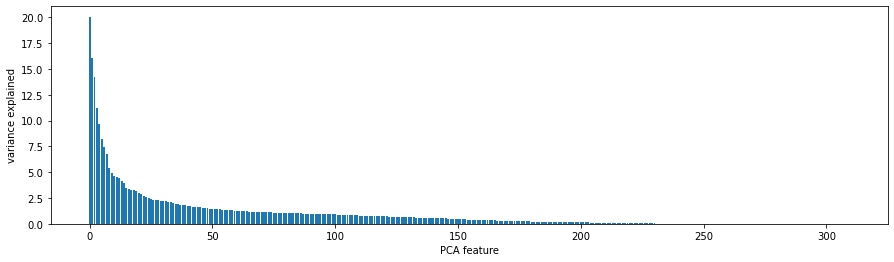

In [36]:
pca = PCA()
pca.fit_transform(df_scaled)
features = range(pca.n_components_)
plt.figure(figsize=(15,4))
plt.bar(features, pca.explained_variance_)
plt.ylabel('variance explained')
plt.xlabel('PCA feature')
plt.show()

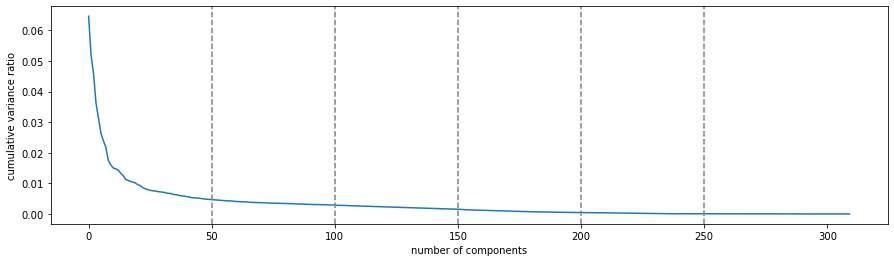

In [37]:
# We also plot the explained variance ratio.
plt.figure(figsize=(15,4))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative variance ratio')
plt.axvline(50, linestyle='--', color='gray')
plt.axvline(100, linestyle='--', color='gray')
plt.axvline(150, linestyle='--', color='gray')
plt.axvline(200, linestyle='--', color='gray')
plt.axvline(250, linestyle='--', color='gray')
plt.show()

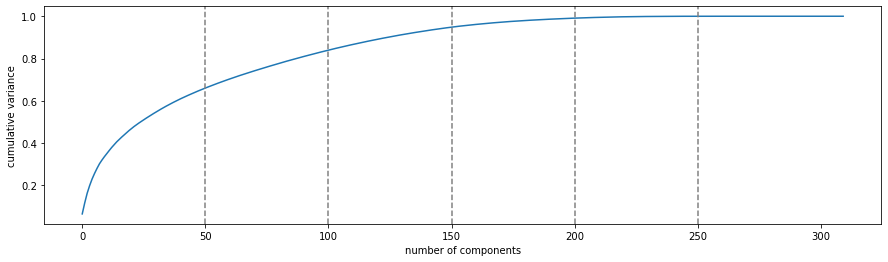

In [38]:
# We also plot the cumultive explained variance ratio.
plt.figure(figsize=(15,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
#plt.ylim([0,1.1])
plt.axvline(50, linestyle='--', color='gray')
plt.axvline(100, linestyle='--', color='gray')
plt.axvline(150, linestyle='--', color='gray')
plt.axvline(200, linestyle='--', color='gray')
plt.axvline(250, linestyle='--', color='gray')
plt.show()

In [39]:
print ("Number of components with explained variance ratio >= 0.01 :", (pca.explained_variance_ratio_>=0.01).sum())
print (f"Total explained variance retained : {pca.explained_variance_ratio_[:np.sum(pca.explained_variance_ratio_>=.01)].sum():2.4f}")

Number of components with explained variance ratio >= 0.01 : 20
Total explained variance retained : 0.4591


In [40]:
print ("Number of components with explained variance ratio >= 0.005 :", (pca.explained_variance_ratio_>=0.005).sum())
print (f"Total explained variance retained : {pca.explained_variance_ratio_[:np.sum(pca.explained_variance_ratio_>=.005)].sum():2.4f}")

Number of components with explained variance ratio >= 0.005 : 46
Total explained variance retained : 0.6362


In [41]:
print ("Number of components with explained variance ratio >= 0.001 :", (pca.explained_variance_ratio_>=0.001).sum())
print (f"Total explained variance retained : {pca.explained_variance_ratio_[:np.sum(pca.explained_variance_ratio_>=.001)].sum():2.4f}")

Number of components with explained variance ratio >= 0.001 : 168
Total explained variance retained : 0.9689


In [42]:
print(f"Number of components to retain 50% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.5).sum()}")
print(f"Number of components to retain 60% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.6).sum()}")
print(f"Number of components to retain 70% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.7).sum()}")
print(f"Number of components to retain 80% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.8).sum()}")
print(f"Number of components to retain 90% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.9).sum()}")
print(f"Number of components to retain 95% explained variance:  {(np.cumsum(pca.explained_variance_ratio_)<0.95).sum()}")

Number of components to retain 50% explained variance:  24
Number of components to retain 60% explained variance:  39
Number of components to retain 70% explained variance:  60
Number of components to retain 80% explained variance:  87
Number of components to retain 90% explained variance:  124
Number of components to retain 95% explained variance:  152


Increasing the retained explained variance ratio is very costly in terms of the number of components that needs to be added: i.e. adding ~20 components to increase the ratio by 10% where each component will add < 0.5%.

Therefore, i will assume 70% as a middle point and then will examine the different options in the supervised learning model to validate our assumption.

In [43]:
# create a pca dataframe based on 70% explained variance retained 
X_pca = PCA(n_components=.70).fit_transform(df_scaled)

col_lst = []
for i in range(0,X_pca.shape[1]):
    col_lst.append(f'PC{i}')
    
pca_df = pd.DataFrame(X_pca,columns=col_lst)
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,12.819688,-2.300248,-1.135686,-1.772058,-0.812934,7.256638,2.596659,-0.784639,-5.392940,6.835211,...,3.021151,-4.465063,-4.089439,5.239037,-6.654012,-4.768194,2.316134,-1.807466,8.020952,-1.769187
1,-0.256508,1.062964,-0.328176,-2.346224,-1.299222,1.071577,0.655045,-0.869318,-2.602598,-0.205666,...,-0.152128,2.002389,3.291641,0.270753,0.330735,-2.445470,0.505306,-0.173966,0.685716,-0.396154
2,9.321712,12.447612,11.860018,5.132276,-2.503735,-1.709726,-1.724426,2.382885,0.693582,1.669627,...,-7.298319,4.787757,-4.780393,11.967633,-5.183933,1.585967,3.056831,-1.927161,0.840395,1.522482
3,6.615546,13.123708,14.719035,2.295331,1.773687,-0.194978,-0.051180,1.831443,-0.428601,-3.435965,...,-9.767678,19.395691,-6.346981,17.557835,-10.320397,-6.497906,3.943106,-3.375238,-1.643743,3.544367
4,6.181308,12.915121,14.824732,2.476769,1.991909,-0.264197,-0.665949,0.782343,0.427164,-3.168815,...,-5.576382,6.539130,-3.867112,7.527014,-3.946393,-0.668093,2.238707,-1.252706,-0.081149,1.890717


In [44]:
# calculate the correlation between the original df_train and pca_df

X_pca = pd.concat([df_train, pca_df], axis=1, join='inner')

corr = X_pca.corr().abs()
corr = corr.loc[df_train.columns,pca_df.columns]
corr.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
y,0.002302,0.001313,0.004511,0.016129,0.024319,0.003567,0.014005,0.022993,0.004816,0.001180,...,0.012952,0.029979,0.006701,0.019047,0.020261,0.011535,0.011270,0.017759,0.011434,0.005597
X0,0.013081,0.015815,0.025341,0.015852,0.009144,0.007807,0.002818,0.009522,0.001809,0.002188,...,0.011076,0.007763,0.008611,0.020181,0.003741,0.023228,0.012822,0.008027,0.002190,0.011247
X1,0.012864,0.029815,0.001698,0.014999,0.001275,0.007410,0.012518,0.015464,0.000656,0.039833,...,0.014134,0.010729,0.016578,0.020250,0.018850,0.018980,0.001890,0.005657,0.023140,0.028761
X2,0.002312,0.008642,0.007284,0.004652,0.020087,0.013035,0.010986,0.001466,0.005774,0.027957,...,0.018150,0.007125,0.011399,0.015153,0.050358,0.021127,0.005053,0.009700,0.002378,0.033834
X3,0.002248,0.006795,0.016457,0.007255,0.008164,0.029317,0.008222,0.003412,0.012463,0.029048,...,0.027513,0.023745,0.024103,0.018642,0.003885,0.028835,0.011144,0.002834,0.005166,0.031689


In [45]:
# check where the correlation is above 0.75
for col in corr.columns:
    for n, i in enumerate(corr.loc[:,col]):
        if (i >=0.75):
            print (f"{col} * {corr.index[n]} : {i:2.4f}")

In [46]:
# trying to lower threshold of 0.2
for col in corr.columns:
    for n, i in enumerate(corr.loc[:,col]):
        if (i >=0.2):
            print (f"{col} * {corr.index[n]} : {i:2.4f}")

PC18 * X204 : 0.2238
PC24 * X204 : 0.2790
PC49 * X252 : 0.5748
PC49 * X372 : 0.3932
PC52 * X252 : 0.2478
PC54 * X252 : 0.2997
PC60 * X5 : 0.2534


### 4. TSNE & UMAP

<AxesSubplot:>

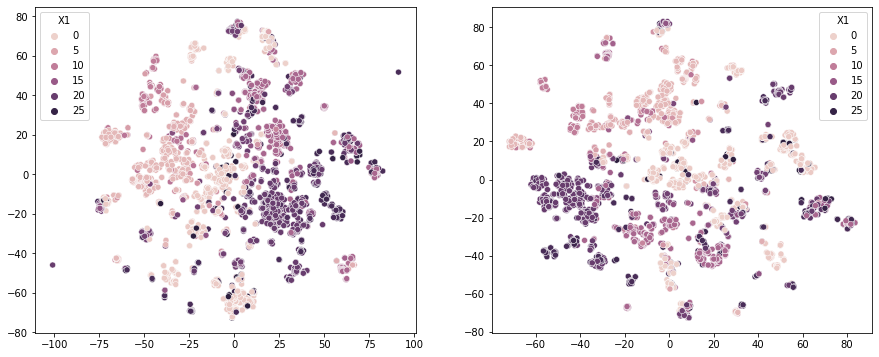

In [47]:
# TSNE on df_scaled and pca_df

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

tsne1 = TSNE (learning_rate=200).fit_transform(df_scaled)
tsne2 = TSNE (learning_rate=200).fit_transform(pca_df)

sns.scatterplot(x=tsne1[:, 0], y=tsne1[:, 1], hue=df_train['X1'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[0])
sns.scatterplot(x=tsne2[:, 0], y=tsne2[:, 1], hue=df_train['X1'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[1])

<AxesSubplot:>

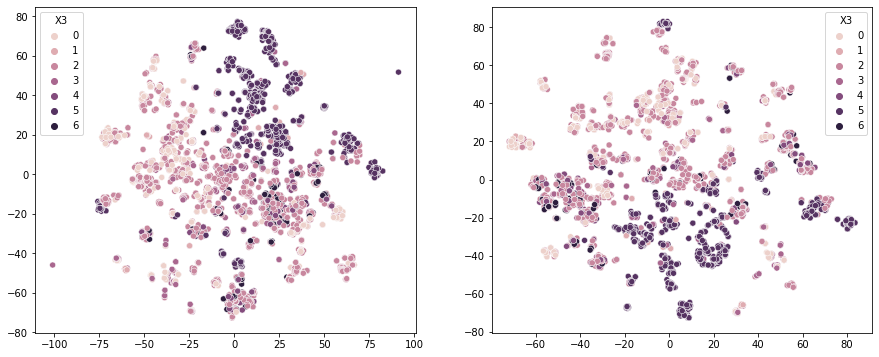

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.scatterplot(x=tsne1[:, 0], y=tsne1[:, 1], hue=df_train['X3'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[0])
sns.scatterplot(x=tsne2[:, 0], y=tsne2[:, 1], hue=df_train['X3'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[1])

D:\Users\505778\Anaconda3_\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
D:\Users\505778\Anaconda3_\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:>

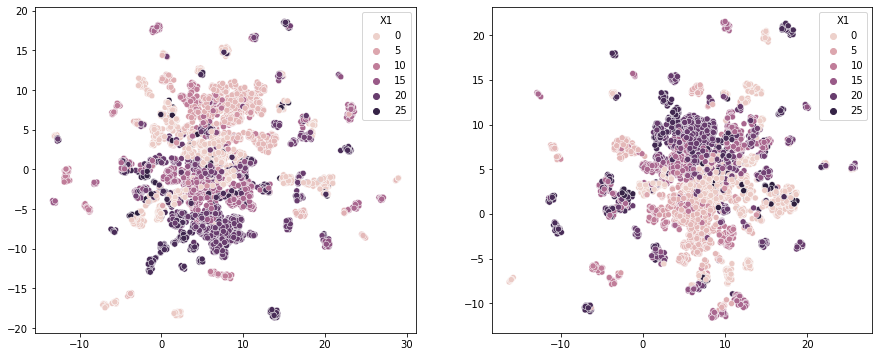

In [49]:
# UMAP on df_scaled and pca_df 
import umap.umap_ as umap
umap1 = umap.UMAP(n_neighbors=20, min_dist=0.9, n_components=2).fit_transform(pca_df)
umap2 = umap.UMAP(n_neighbors=20, min_dist=0.9, n_components=2).fit_transform(df_scaled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.scatterplot(x=umap1[:, 0], y=umap1[:, 1], hue=df_train['X1'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[0])
sns.scatterplot(x=umap2[:, 0], y=umap2[:, 1], hue=df_train['X1'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[1])

<AxesSubplot:>

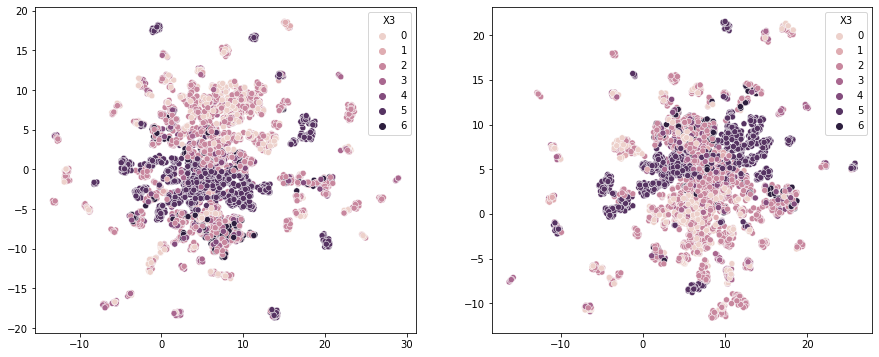

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.scatterplot(x=umap1[:, 0], y=umap1[:, 1], hue=df_train['X3'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[0])
sns.scatterplot(x=umap2[:, 0], y=umap2[:, 1], hue=df_train['X3'], cmap = sns.cubehelix_palette(as_cmap=True), ax=axes[1])

### 4. Supervised Learning Model

In [51]:
# Split pca_df, y data
X_train, X_test, y_train, y_test = train_test_split(pca_df,y,test_size=0.3,random_state=42)

In [52]:
# Based on mutiple runs, best parameters : {'pca__n_components': 0.6, 'rf__max_depth': 10.0, 
# 'rf__min_samples_leaf': 5, 'rf__n_estimators': 50}
# but we are not using gridsearchCV here which could explain the different results
rf = RandomForestRegressor(max_depth=10,n_estimators=50,min_samples_leaf=10)
rf.fit(X_train,y_train)
print (f"R2 score for train data  : {rf.score(X_train,y_train):2.4f}")
print (f"MSE for train data: {mean_squared_error(y_train,rf.predict(X_train)):2.4f}") 
print (f"RMSE for train data: {np.sqrt(mean_squared_error(y_train,rf.predict(X_train))):2.4f}") 

R2 score for train data  : 0.7107
MSE for train data: 43.3545
RMSE for train data: 6.5844


In [53]:
print (f"R2 score for test data  : {rf.score(X_test,y_test):2.4f}")
print (f"MSE for test data: {mean_squared_error(y_test,rf.predict(X_test)):2.4f}") 
print (f"RMSE for test data: {np.sqrt(mean_squared_error(y_test,rf.predict(X_test))):2.4f}") 

R2 score for test data  : 0.4872
MSE for test data: 85.3917
RMSE for test data: 9.2408


### 5. Using Pipeline

In [54]:
# Split X, y data (df_train after cleaning and normalizing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
#rf_param_grid = {
#    'pca__n_components': [0.5, 0.6, 0.7, 0.8, 0.9],
#    'rf__max_depth': [10],
#    'rf__n_estimators': [50],
#    'rf__min_samples_leaf': [5]}

rf_param_grid = {
    'pca__n_components': [0.5, 0.6, 0.7, 0.8, 0.9],
    'rf__max_depth': np.linspace(5,15,3),
    'rf__n_estimators': [50,100],
    'rf__min_samples_leaf': np.linspace(5,15,3, dtype=int)}

rf_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('pca', PCA()),
                          ('rf', RandomForestRegressor())])

rf_grid =GridSearchCV(rf_pipeline, rf_param_grid, cv=5, return_train_score = True)
    
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'pca__n_components': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'rf__max_depth': array([ 5., 10., 15.]),
                         'rf__min_samples_leaf': array([ 5, 10, 15]),
                         'rf__n_estimators': [50, 100]},
             return_train_score=True)

In [56]:
print (f"Best score : {rf_grid.best_score_:2.4f}")
print (f"Best parameters : {rf_grid.best_params_}")

Best score : 0.5326
Best parameters : {'pca__n_components': 0.7, 'rf__max_depth': 10.0, 'rf__min_samples_leaf': 10, 'rf__n_estimators': 100}


In [57]:
params = ((rf_grid.cv_results_['param_rf__max_depth']== rf_grid.best_params_['rf__max_depth']) & (rf_grid.cv_results_['param_rf__min_samples_leaf']== rf_grid.best_params_['rf__min_samples_leaf'])  & (rf_grid.cv_results_['param_rf__n_estimators']== rf_grid.best_params_['rf__n_estimators'])) 
pca_ = rf_grid.cv_results_['param_pca__n_components'][params]
train_score = rf_grid.cv_results_["mean_train_score"][params]
test_score = rf_grid.cv_results_["mean_test_score"][params]
pd.DataFrame({'pca': pca_,'train score': train_score, 'test score': test_score})

,pca,train score,test score
0,0.5,0.687823,0.527760
1,0.6,0.702205,0.530797
2,0.7,0.711221,0.532571
3,0.8,0.716098,0.530934
4,0.9,0.722149,0.526786


In [58]:
rf_estimator = rf_grid.best_estimator_
print (f"Test data score : {rf_estimator.score(X_test, y_test):2.4f}")

Test data score : 0.4934


<AxesSubplot:>

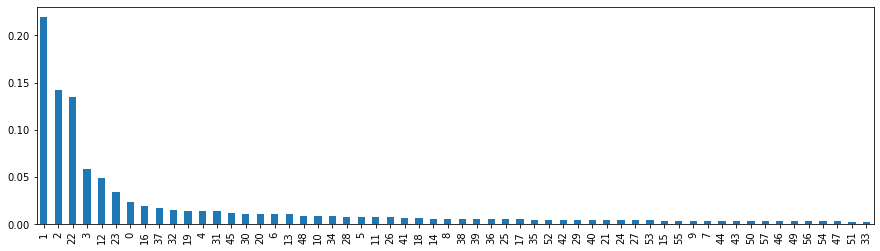

In [59]:
data = pd.Series(rf_estimator[2].feature_importances_)
data.sort_values(ascending=False).plot.bar(figsize=(15,4))

### 6. Conclusion

1. Data cleaning is crucial : I did mutiple runs and every time I end up with different understanding of the data.
2. Based on the pipeline model, adding more components with very little explained variance ratio to the PCA adds minimum value to the final score. 